In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import seaborn as sns 
import matplotlib.pyplot as plt

# 1. load data

In [6]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer

In [7]:
label_tf_idf = pd.read_csv('/content/drive/Shareddrives/datamining_2022/merged.csv',encoding = 'cp949', index_col=0)

In [8]:
label_tf_idf.head()

,index,big_category,small_category,ranking,name,price,sale_price,sale_ratio,delivery,morph,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
Column2,,,,,,,,,,,,,,,,,,,,,
0,3,e쿠폰/티켓,외식,5,[스타벅스](스타벅스)(APP전용) e카드 3만원 교환권,30000,30000,0,해당사항없음,"['[', '스타벅스', '](', '스타벅스', ')(', 'APP', '전용',...",...,0,0,0,0,0,0,0,0,0,0
1,8,e쿠폰/티켓,외식,10,[쿠우쿠우](쿠우쿠우) 기프티카드 7만원권,70000,67900,3,해당사항없음,"['[', '쿠우', '쿠우', '](', '쿠우', '쿠우', ')', '기', ...",...,0,0,0,0,0,0,0,0,0,0
2,9,e쿠폰/티켓,외식,11,[아웃백스테이크하우스](아웃백/이디야) 페이즈 기프트 외식 5만원권,50000,47000,6,해당사항없음,"['[', '아웃백', '스테이크하우스', '](', '아웃백', '/', '이디야...",...,0,0,0,0,0,0,0,0,0,0
3,11,e쿠폰/티켓,외식,13,[아웃백스테이크하우스]아웃백 디지털 3만원권,30000,27870,7,해당사항없음,"['[', '아웃백', '스테이크하우스', ']', '아웃백', '디지털', '3만...",...,0,0,0,0,0,0,0,0,0,0
4,16,e쿠폰/티켓,외식,18,[맥도날드](맥도날드) 디지털 1만원권,10000,9700,3,해당사항없음,"['[', '맥도날드', '](', '맥도날드', ')', '디지털', '1만원',...",...,0,0,0,0,0,0,0,0,0,0


In [9]:
label_tf_idf.shape

(2000, 4321)

In [10]:
label = label_tf_idf['big_category']

In [11]:
categories = set(label)

In [12]:
categories

{'e쿠폰/티켓',
 '가구/침구',
 '도서/음반',
 '생활/주방/건강',
 '스포츠/자동차',
 '식품',
 '신발/잡화',
 '여행',
 '유아동/출산',
 '컴퓨터/전자',
 '패션의류',
 '화장품/헤어'}

In [13]:
label_tf_idf.columns

Index(['index', 'big_category', 'small_category', 'ranking', 'name', 'price',
       'sale_price', 'sale_ratio', 'delivery', 'morph',
       ...
       '콘도', '리본', '공공기관', '춘천', '펜', '하디', '주년', '프로젝터', '방수', '가야'],
      dtype='object', length=4321)

In [14]:
label_tf_idf.columns[1]

'big_category'

In [15]:
tf_idf_table = label_tf_idf[label_tf_idf.columns[11:4321]]

In [16]:
tf_idf_table

,잔꽃,용품,렛,아유,날,라코스테,장군,토너,디파이,얼마나,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
Column2,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pd.DataFrame(tf_idf_table)

,잔꽃,용품,렛,아유,날,라코스테,장군,토너,디파이,얼마나,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
Column2,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(tf_idf_table,label,test_size=0.2)

# 카테고리에 따른 키워드들 시각화

In [25]:
from wordcloud import WordCloud
# 폰트 지정
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Daum_SemiBold.ttf')

In [32]:
len(categories)

12

In [41]:
count_dict = {}
for category in categories: 
  for label_ in label:
    if label_ == category: 
      count_dict[category] =  count_dict.get(category,0)+1

In [47]:
count_dict

{'e쿠폰/티켓': 72,
 '가구/침구': 83,
 '도서/음반': 177,
 '생활/주방/건강': 260,
 '스포츠/자동차': 153,
 '식품': 221,
 '신발/잡화': 187,
 '여행': 56,
 '유아동/출산': 245,
 '컴퓨터/전자': 291,
 '패션의류': 102,
 '화장품/헤어': 153}

In [103]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

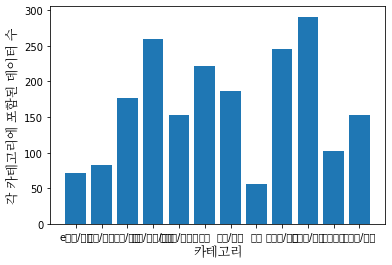

<Figure size 2880x2160 with 0 Axes>

In [109]:
font_path = '/content/drive/Shareddrives/datamining_2022/NanumMyeongjo-Regular.ttf'
fontprop = fm.FontProperties(fname=font_path, size=13)
cnt_dict = count_dict.items()
cnt_dict = sorted(cnt_dict)
plt.xlabel('카테고리',fontproperties=fontprop) # x label
plt.ylabel('각 카테고리에 포함된 데이터 수', fontproperties=fontprop) # y label
x, y = zip(*cnt_dict)
fontprop = fm.FontProperties(fname=font_path, size=5).get_name()
plt.rc('font', family=fontprop)
plt.bar(x, y)
plt.figure(figsize=(40,30))
plt.show()

In [110]:
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [113]:
tfidf_df = pd.concat([tf_idf_table, label], axis=1)
print(tfidf_df)

         잔꽃  용품  렛  아유  날  라코스테  장군   토너  디파이  얼마나  ...  리본  공공기관  춘천  펜  하디  \
Column2                                             ...                        
0         0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
1         0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
2         0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
3         0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
4         0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
...      ..  .. ..  .. ..   ...  ..  ...  ...  ...  ...  ..   ...  .. ..  ..   
1995      0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
1996      0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
1997      0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
1998      0   0  0   0  0   0.0   0  0.0    0    0  ...   0     0   0  0   0   
1999      0   0  0   0  0   0.0   0  0.0

In [118]:
plt.figure(figsize=(20,20))
pos_freq = FreqDist(' '.join(tfidf_df[tfidf_df['big_category'] == 'e쿠폰/티켓'].astpe(str).apply(stop)).split(' '))
wc = WordCloud().generate_from_frequencies(frequencies=pos_freq)
plt.imshow(wc,interpolation='bilinear')
plt.title('Positive Review Common Text')
plt.axis('off')
plt.show()

AttributeError: ignored

<Figure size 1440x1440 with 0 Axes>

### 나이브 베이즈 분류기(Naive Bayse Classifier)를 이용한 문서 분류
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train, y_train) #train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test, y_test))) #test set에 대한 예측정확도를 확인

Train set score: 0.988
Test set score: 0.730


### 의사결정나무를 이용한 문서 분류

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
print('#Decision Tree train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(tree.score(X_test, y_test)))

#Decision Tree train set score: 0.999
#Decision Tree test set score: 0.557


# PCA 결과 LogisticRegression에 넣음

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.linear_model import LogisticRegression 
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train, y_train) # train data를 이용하여 분류기를 학습
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test))) 

#Train set score: 0.999
#Test set score: 0.698


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 1000)
Sum of explained variance ratio: 0.923
#Train set score: 0.997
#Test set score: 0.713


In [ ]:
pca = PCA(n_components=1500, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 1500)
Sum of explained variance ratio: 0.999
#Train set score: 0.999
#Test set score: 0.708


In [ ]:
pca = PCA(n_components=500, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

LR_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 500)
Sum of explained variance ratio: 0.687
#Train set score: 0.991
#Test set score: 0.690


# PCA 결과 NB에 넣음( MinMax Scaler 이용)  -> 아님!

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

#ValueError: Negative values in data passed to MultinomialNB (input X) 에러 방지
scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=1000, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

NB_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 1000)
Sum of explained variance ratio: 0.923
#Train set score: 0.290
#Test set score: 0.225


In [ ]:
pca = PCA(n_components=500, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

NB_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 500)
Sum of explained variance ratio: 0.687
#Train set score: 0.246
#Test set score: 0.223


In [ ]:
pca = PCA(n_components=1500, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

NB_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_pca, y_test)))

Original tfidf matrix shape: (1600, 4310)
PCA Converted matrix shape: (1600, 1500)
Sum of explained variance ratio: 0.999
#Train set score: 0.306
#Test set score: 0.235


In [ ]:
pca = PCA(n_components=1700, random_state=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
print('Original tfidf matrix shape:', X_train.shape)
print('PCA Converted matrix shape:', X_train_pca.shape)
print('Sum of explained variance ratio: {:.3f}'.format(pca.explained_variance_ratio_.sum()))

NB_clf.fit(X_train_pca, y_train)
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_pca, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_pca, y_test)))

ValueError: ignored

# label이 없을 때

** label이 없었음

In [ ]:
tf_idf = pd.read_csv('/content/drive/Shareddrives/datamining_2022/tfidf.csv',encoding = 'cp949', index_col=0)

In [ ]:
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)

In [ ]:
tf_idf

,잔꽃,용품,렛,아유,날,라코스테,장군,토너,디파이,얼마나,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
Column1,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


칼럼명 확인하기

In [ ]:
tf_idf.columns

Index(['잔꽃', '용품', '렛', '아유', '날', '라코스테', '장군', '토너', '디파이', '얼마나',
       ...
       '콘도', '리본', '공공기관', '춘천', '펜', '하디', '주년', '프로젝터', '방수', '가야'],
      dtype='object', length=4310)

In [ ]:
tf_idf.shape

(2000, 4310)

In [ ]:
tf_idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Columns: 4310 entries, 잔꽃 to 가야
dtypes: float64(657), int64(3653)
memory usage: 65.8 MB


In [ ]:
tf_idf.describe()

,잔꽃,용품,렛,아유,날,라코스테,장군,토너,디파이,얼마나,...,콘도,리본,공공기관,춘천,펜,하디,주년,프로젝터,방수,가야
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.003500,0.027500,0.007000,0.014000,0.009000,0.015537,0.003500,0.014523,0.003500,0.003500,...,0.003500,0.009000,0.003500,0.00700,0.023500,0.00700,0.003500,0.003500,0.023500,0.003500
std,0.156525,0.369881,0.221304,0.626099,0.232263,0.416703,0.156525,0.290166,0.156525,0.156525,...,0.156525,0.232263,0.156525,0.31305,0.409917,0.31305,0.156525,0.156525,0.409917,0.156525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,7.000000,5.000000,7.000000,28.000000,6.000000,12.429216,7.000000,5.809143,7.000000,7.000000,...,7.000000,6.000000,7.000000,14.00000,11.000000,14.00000,7.000000,7.000000,11.000000,7.000000


In [ ]:
max_val_df=pd.DataFrame(tf_idf.max(axis=0),columns=['max_val'])
max_val_df

,max_val
잔꽃,7.0
용품,5.0
렛,7.0
아유,28.0
날,6.0
...,...
하디,14.0
주년,7.0
프로젝터,7.0
방수,11.0


In [ ]:
max_val_df.sort_values(by=['max_val'],ascending=False)[:50].index #TF-IDF 값 상위 50개 단어

Index(['노트', '아유', '쿠우', '텐트', '니', '의자', '요미', '비치', '안', '치즈', '매트', '끈',
       '보험', '토퍼', '타투', '츠비', '신라', '잔나비', '색연필', '미샤', '쏠', '꿈', '아치', '버',
       '길벗', '독', '비룡소', '토시', '부산', '김해', '선반', '커피', '이디야', '베드', '파크', '노마',
       '숲', '말', '이불', '우유', '지갑', '정장', '가방', '레', '박스', '골프', '홍삼', '형',
       '더페이스샵', '다리'],
      dtype='object')

In [ ]:
max_val_df.sort_values(by=['max_val'])[:50].index  #TF-IDF 값 하위 50개 단어

Index(['여름', '여성', '상품', '증정', '카드', '할인', '아기', '프리미엄', '행사', '팬츠', '산', '단계',
       '용량', '품', '워시', '캡', '신상', '쿠폰', '무선', '국내', '미니', '스니커즈', '특', '백화점',
       '케이스', '스마트', '여자', '컬러', '전', '라이트', '막', '외', '온', '판', '중형', '틴',
       '공용', '울트라', '멀티', '가능', '리지', '플러스', '최신', '가정', '당일', '스위치', '소형',
       '핸드폰', '널', '밍'],
      dtype='object')

In [ ]:
max_index_50 = max_val_df.sort_values(by=['max_val'],ascending=False)[:50].index

In [ ]:
max_index_50

Index(['노트', '아유', '쿠우', '텐트', '니', '의자', '요미', '비치', '안', '치즈', '매트', '끈',
       '보험', '토퍼', '타투', '츠비', '신라', '잔나비', '색연필', '미샤', '쏠', '꿈', '아치', '버',
       '길벗', '독', '비룡소', '토시', '부산', '김해', '선반', '커피', '이디야', '베드', '파크', '노마',
       '숲', '말', '이불', '우유', '지갑', '정장', '가방', '레', '박스', '골프', '홍삼', '형',
       '더페이스샵', '다리'],
      dtype='object')

In [ ]:
max_50_tf_idf = tf_idf[max_index_50]

In [ ]:
max_50_tf_idf.shape

(2000, 50)

In [ ]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [ ]:
Z = tsne.fit_transform(max_50_tf_idf.T)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.001s...
[t-SNE] Computed neighbors for 50 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 14.291236
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.931839
[t-SNE] KL divergence after 1750 iterations: 0.544327


In [ ]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 227.3618     82.59951 ]
 [  59.904987 -202.53186 ]
 [ 150.85687   141.48737 ]
 [ 180.33452   -36.982594]
 [-179.40361   -13.466768]]
Top words:  50


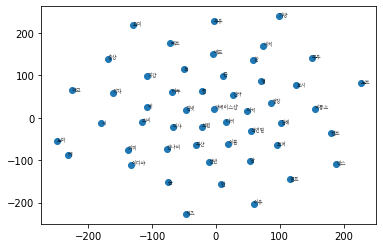

In [ ]:
path = '/content/drive/Shareddrives/datamining_2022/NanumMyeongjo-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=5)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(max_index_50)):
    plt.annotate(s=max_index_50[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

# TF-IDF score **top 100** 단어를 시각화 시키기

In [ ]:
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(tf_idf)

In [ ]:
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['가게', '이끼', '이나', '이노', '이니셜', '이동식', '이드', '이디야', '이랜드', '이레', '이론', '이마트', '이모티콘', '이목', '이문열', '이뮨', '이민', '이벤트', '이불', '이브', '이블', '이상', '이솝', '이스', '이스트', '이승조', '이야기', '이어폰', '이엠', '이온', '이용', '이용권', '이용호', '이월', '이유', '이유식', '이은경', '이임', '이제훈', '이즈', '이지', '이징', '이철', '이케아', '이콘', '이크', '이탈', '이태리', '이편', '이프', '이후', '익스플로러', '익일', '인견', '인공', '인기', '인덕션', '인도', '인디고', '인물', '인바디', '인버터', '인사', '인생', '인솔', '인쇄', '인스탁', '인스탁스', '인스피', '인용', '일드', '일력', '일루', '일리', '일반', '일반인', '일본', '일상', '일일', '일주', '일품', '일회용', '임박', '임부', '임부복', '임산부', '임실', '임영웅', '입봉', '입시', '입자', '입장권', '입체', '잉어', '잉크', '잉크젯', '자가', '자가진단', '자극', '자급']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(tfidf_dict)

100

In [ ]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(4310, 100)

In [ ]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [ ]:
print(data_array.shape)
print(data_array.T.shape)

(4310, 100)
(100, 4310)


우리는 100차원에 존재하는 2000개의 상품들을 2차원에 2000개의 상품으로 표현하려고 함 (2x2000)

In [ ]:
Z = tsne.fit_transform(data_array.T)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.051808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 650 iterations: 0.000000


In [ ]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ -751.74664     53.364777]
 [   24.327814 -1177.6184  ]
 [  892.7051     794.2768  ]
 [ -231.96474    454.0022  ]
 [  605.85156    736.01874 ]]
Top words:  100


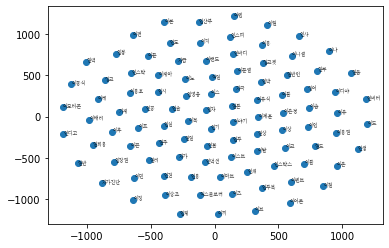

In [ ]:
path = '/content/drive/Shareddrives/datamining_2022/NanumMyeongjo-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=5)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

# TF-IDF 전체 2000개 상품간 관계 2차원에 모두 표현한 것

In [ ]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

4310차원에 존재하는 2000개의 상품들을 2차원에 2000개의 상품으로 표현하려고 함 (2x2000)

In [ ]:
Z = tsne.fit_transform(tf_idf.T)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4310 samples in 0.011s...
[t-SNE] Computed neighbors for 4310 samples in 1.713s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4310
[t-SNE] Computed conditional probabilities for sample 2000 / 4310
[t-SNE] Computed conditional probabilities for sample 3000 / 4310
[t-SNE] Computed conditional probabilities for sample 4000 / 4310
[t-SNE] Computed conditional probabilities for sample 4310 / 4310
[t-SNE] Mean sigma: 1.512221
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.700417
[t-SNE] KL divergence after 10000 iterations: 1.285061


In [ ]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 500.2493   774.78534]
 [ 100.76863  386.1505 ]
 [ 218.3181  -962.9169 ]
 [-239.87257  509.10245]
 [ 431.55777  272.23425]]
Top words:  4310


In [ ]:
columns = tf_idf.columns

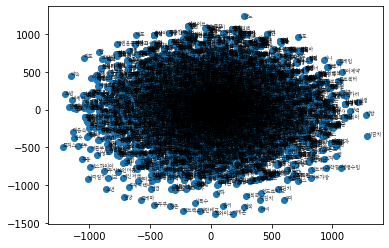

In [ ]:
path = '/content/drive/Shareddrives/datamining_2022/NanumMyeongjo-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=5)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(columns)):
    plt.annotate(s=columns[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), fontProperties =fontprop)

plt.draw()

# 그래프 그리기

In [ ]:
import seaborn as sns

In [ ]:
max_50_tf_idf

,노트,아유,쿠우,텐트,니,의자,요미,비치,안,치즈,...,지갑,정장,가방,레,박스,골프,홍삼,형,더페이스샵,다리
Column1,,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
1,0.0,0,27.631021,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
2,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
3,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
4,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
1996,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0
1997,0.0,0,0.000000,0,0,0.0,0,0,0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0.0,0,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_

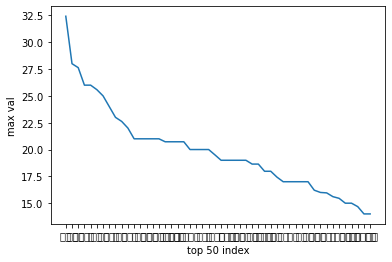

In [ ]:
import matplotlib.pyplot as plt
fontprop = fm.FontProperties(fname=path, size=5)

plt.plot(max_index_50, max_val_df.sort_values(by=['max_val'],ascending=False)[:50])
plt.xlabel('top 50 index')
plt.ylabel('max val')

plt.show()

# 1. remove csv 파일 만들기

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/datamining_2022/delivery_href.csv')

In [ ]:
df.head()

,main_category_name,sub_category_name,ranking,title,ori_price,dis_price,discount_percent,free_delivery,delivery_href
0,ALL,ALL,1.0,[이마트24](빅스마일데이) 이마트24 디지털 1만원권,10000.0,7600.0,24.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24313...
1,여행,ALL,1.0,경주월드 5월 자유이용권 종일/오후 주말야간개장 (5/1~5/31),20900.0,20900.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24231...
2,e쿠폰/티켓,ALL,1.0,[컬쳐랜드문화상품권](스마일클럽) 컬쳐랜드 온라인 문화상품권 5만원,50000.0,46500.0,7.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24299...
3,도서/음반,ALL,1.0,아람키즈- 말하는 첫 발견 시리즈 (50권 전권 필름책 + 활동북20권 + QR활용...,600000.0,478700.0,20.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=24377...
4,스포츠/자동차,ALL,1.0,[MLB]MLB 캠핑샌들 EVA샌들 슬리퍼 남성 여성 아동 여름,66300.0,19900.0,69.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=18030...


In [ ]:
df.main_category_name.value_counts().to_frame()

,main_category_name
컴퓨터/전자,4800
식품,4200
생활/주방/건강,4200
유아동/출산,3600
도서/음반,3057
신발/잡화,3000
스포츠/자동차,2700
화장품/헤어,2700
패션의류,2100
가구/침구,1548


# 2. Preprocess the data

In [ ]:
df.isnull().sum()

main_category_name    3
sub_category_name     3
ranking               5
title                 3
ori_price             5
dis_price             5
discount_percent      5
free_delivery         3
delivery_href         3
dtype: int64

In [ ]:
df = df.dropna(axis=0)

NaN 값이 있는 행 제거

In [ ]:
df.isnull().sum()

main_category_name    0
sub_category_name     0
ranking               0
title                 0
ori_price             0
dis_price             0
discount_percent      0
free_delivery         0
delivery_href         0
dtype: int64

In [ ]:
mask =  df['main_category_name'].isin(['ALL'])

In [ ]:
mask2 = df['sub_category_name'].isin(['ALL'])

In [ ]:
df1 = df[~mask]

In [ ]:
df1

,main_category_name,sub_category_name,ranking,title,ori_price,dis_price,discount_percent,free_delivery,delivery_href
1,여행,ALL,1.0,경주월드 5월 자유이용권 종일/오후 주말야간개장 (5/1~5/31),20900.0,20900.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24231...
2,e쿠폰/티켓,ALL,1.0,[컬쳐랜드문화상품권](스마일클럽) 컬쳐랜드 온라인 문화상품권 5만원,50000.0,46500.0,7.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24299...
3,도서/음반,ALL,1.0,아람키즈- 말하는 첫 발견 시리즈 (50권 전권 필름책 + 활동북20권 + QR활용...,600000.0,478700.0,20.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=24377...
4,스포츠/자동차,ALL,1.0,[MLB]MLB 캠핑샌들 EVA샌들 슬리퍼 남성 여성 아동 여름,66300.0,19900.0,69.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=18030...
5,컴퓨터/전자,ALL,1.0,[로보락]로보락 S7 MaxV Ultra 로봇청소기 울트라 자동세척,1694110.0,1590000.0,6.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=24139...
...,...,...,...,...,...,...,...,...,...
35232,도서/음반,경제/경영/개발,97.0,뜨겁게 투자하고 차갑게 승부하라 : 수익률 2200배의 비밀 BHAG 레버리지 집...,15120.0,15120.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=23941...
35233,도서/음반,경제/경영/개발,98.0,10배의 법칙 - 성공과 실패를 가르는 유일한 차이,15120.0,15120.0,0.0,스마일배송,http://item.gmarket.co.kr/Item?goodscode=24055...
35234,도서/음반,경제/경영/개발,99.0,나는 대출 없이 0원으로 소형 아파트를 산다 300만 원으로 100억 자산을 이룬 ...,18000.0,18000.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=24169...
35235,도서/음반,경제/경영/개발,100.0,엘리어트 파동 이론(ELLIOTT WAVE PRINCIPLE),15210.0,15210.0,0.0,스마일배송,http://item.gmarket.co.kr/Item?goodscode=19205...


In [ ]:
df1 = df1[~mask2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,main_category_name,sub_category_name,ranking,title,ori_price,dis_price,discount_percent,free_delivery,delivery_href
191,e쿠폰/티켓,외식,1.0,(파리바게뜨) 실키롤케익,11000.0,8800.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
421,e쿠폰/티켓,외식,2.0,[설빙](설빙) 설빙 디지털 금액권 2만원권,20000.0,16200.0,19.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24279...
422,e쿠폰/티켓,외식,3.0,[아웃백스테이크하우스]아웃백 디지털 5만원권,50000.0,46450.0,7.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=15365...
423,e쿠폰/티켓,외식,4.0,(파리바게뜨) 블레싱 초코베리 케이크,33000.0,26400.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
424,e쿠폰/티켓,외식,5.0,[스타벅스](스타벅스)(APP전용) e카드 3만원 교환권,30000.0,30000.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=22463...
...,...,...,...,...,...,...,...,...,...
35232,도서/음반,경제/경영/개발,97.0,뜨겁게 투자하고 차갑게 승부하라 : 수익률 2200배의 비밀 BHAG 레버리지 집...,15120.0,15120.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=23941...
35233,도서/음반,경제/경영/개발,98.0,10배의 법칙 - 성공과 실패를 가르는 유일한 차이,15120.0,15120.0,0.0,스마일배송,http://item.gmarket.co.kr/Item?goodscode=24055...
35234,도서/음반,경제/경영/개발,99.0,나는 대출 없이 0원으로 소형 아파트를 산다 300만 원으로 100억 자산을 이룬 ...,18000.0,18000.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=24169...
35235,도서/음반,경제/경영/개발,100.0,엘리어트 파동 이론(ELLIOTT WAVE PRINCIPLE),15210.0,15210.0,0.0,스마일배송,http://item.gmarket.co.kr/Item?goodscode=19205...


In [ ]:
dataframe = pd.DataFrame(df1)
dataframe.to_csv("/content/drive/Shareddrives/datamining_2022/remove_all.csv", header=False, index = False,encoding='utf-8-sig')

In [ ]:
dataframe = dataframe.drop_duplicates(['main_category_name','sub_category_name','title','ori_price','dis_price'])

In [ ]:
dataframe

,main_category_name,sub_category_name,ranking,title,ori_price,dis_price,discount_percent,free_delivery,delivery_href
191,e쿠폰/티켓,외식,1.0,(파리바게뜨) 실키롤케익,11000.0,8800.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
421,e쿠폰/티켓,외식,2.0,[설빙](설빙) 설빙 디지털 금액권 2만원권,20000.0,16200.0,19.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24279...
422,e쿠폰/티켓,외식,3.0,[아웃백스테이크하우스]아웃백 디지털 5만원권,50000.0,46450.0,7.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=15365...
423,e쿠폰/티켓,외식,4.0,(파리바게뜨) 블레싱 초코베리 케이크,33000.0,26400.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
424,e쿠폰/티켓,외식,5.0,[스타벅스](스타벅스)(APP전용) e카드 3만원 교환권,30000.0,30000.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=22463...
...,...,...,...,...,...,...,...,...,...
11739,가구/침구,침구,98.0,시원한스노우리플여름누비이불패드풀세트SSQK사이즈,75900.0,75900.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=20979...
11740,가구/침구,침구,99.0,순면누빔 고정밴딩 여름침대패드/인견패드,22900.0,22900.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=54508...
11741,가구/침구,침구,100.0,[베드리움][금성침대 X 베드리움] [베드리움] 슈페르 프리미엄 300T 매트리스(...,274000.0,246600.0,10.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=17521...
11742,여행,국내여행,99.0,네스트호텔 인천(인천 호텔/중구/인천국제공항(중구)),132000.0,129360.0,2.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=15971...


In [ ]:
dataframe = dataframe.drop_duplicates(['delivery_href'])

In [ ]:
dataframe

,main_category_name,sub_category_name,ranking,title,ori_price,dis_price,discount_percent,free_delivery,delivery_href
191,e쿠폰/티켓,외식,1.0,(파리바게뜨) 실키롤케익,11000.0,8800.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
421,e쿠폰/티켓,외식,2.0,[설빙](설빙) 설빙 디지털 금액권 2만원권,20000.0,16200.0,19.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24279...
422,e쿠폰/티켓,외식,3.0,[아웃백스테이크하우스]아웃백 디지털 5만원권,50000.0,46450.0,7.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=15365...
423,e쿠폰/티켓,외식,4.0,(파리바게뜨) 블레싱 초코베리 케이크,33000.0,26400.0,20.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=24358...
424,e쿠폰/티켓,외식,5.0,[스타벅스](스타벅스)(APP전용) e카드 3만원 교환권,30000.0,30000.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=22463...
...,...,...,...,...,...,...,...,...,...
11739,가구/침구,침구,98.0,시원한스노우리플여름누비이불패드풀세트SSQK사이즈,75900.0,75900.0,0.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=20979...
11740,가구/침구,침구,99.0,순면누빔 고정밴딩 여름침대패드/인견패드,22900.0,22900.0,0.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=54508...
11741,가구/침구,침구,100.0,[베드리움][금성침대 X 베드리움] [베드리움] 슈페르 프리미엄 300T 매트리스(...,274000.0,246600.0,10.0,무료배송,http://item.gmarket.co.kr/Item?goodscode=17521...
11742,여행,국내여행,99.0,네스트호텔 인천(인천 호텔/중구/인천국제공항(중구)),132000.0,129360.0,2.0,해당사항없음,http://item.gmarket.co.kr/Item?goodscode=15971...


In [ ]:
dataframe.to_csv("/content/drive/Shareddrives/datamining_2022/product.csv", header=False, index = False,encoding='utf-8-sig')

# 다음 과정 

In [ ]:
count_vec = CountVectorizer()
product = count_vec.fit_transform(df['title'])
product = np.array(product.todense())

In [ ]:
X = product
y = df['main_category_name']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# 3. Fit the model

In [ ]:
model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred, average="macro")

# 4. Examine the predictions

In [ ]:
print(classification_report(y_test, y_pred))